# Import Libraries and set up envirounment

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.default = "iframe"
pio.renderers.default = "notebook_connected"
import warnings 
warnings.filterwarnings('ignore')


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR  
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [2]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

for dirname, _, filenames in os.walk('/kaggle/working'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Read Data

In [3]:
df = pd.read_csv(r'../data/retail_store_inventory.csv')

In [4]:
df

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73095,2024-01-01,S005,P0016,Furniture,East,96,8,127,18.46,73.73,20,Snowy,0,72.45,Winter
73096,2024-01-01,S005,P0017,Toys,North,313,51,101,48.43,82.57,10,Cloudy,0,83.78,Autumn
73097,2024-01-01,S005,P0018,Clothing,West,278,36,151,39.65,11.11,10,Rainy,0,10.91,Winter
73098,2024-01-01,S005,P0019,Toys,East,374,264,21,270.52,53.14,20,Rainy,0,55.80,Spring


# Exploring Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                73100 non-null  object 
 1   Store ID            73100 non-null  object 
 2   Product ID          73100 non-null  object 
 3   Category            73100 non-null  object 
 4   Region              73100 non-null  object 
 5   Inventory Level     73100 non-null  int64  
 6   Units Sold          73100 non-null  int64  
 7   Units Ordered       73100 non-null  int64  
 8   Demand Forecast     73100 non-null  float64
 9   Price               73100 non-null  float64
 10  Discount            73100 non-null  int64  
 11  Weather Condition   73100 non-null  object 
 12  Holiday/Promotion   73100 non-null  int64  
 13  Competitor Pricing  73100 non-null  float64
 14  Seasonality         73100 non-null  object 
dtypes: float64(3), int64(5), object(7)
memory usage: 8.4+

In [6]:
df.isna().sum()

Date                  0
Store ID              0
Product ID            0
Category              0
Region                0
Inventory Level       0
Units Sold            0
Units Ordered         0
Demand Forecast       0
Price                 0
Discount              0
Weather Condition     0
Holiday/Promotion     0
Competitor Pricing    0
Seasonality           0
dtype: int64

In [7]:
df.duplicated().sum()

0

**Drop Unneeded Columns & Rename Columns**

In [8]:
df.drop(columns=['Date', 'Store ID', 'Product ID'], axis=1, inplace=True)

In [9]:
df = df.rename(columns={'Inventory Level': 'Inventory', 
                        'Units Sold': 'Sales', 
                        'Units Ordered': 'Orders', 
                        'Demand Forecast': 'Demand', 
                        'Weather Condition': 'Weather', 
                        'Holiday/Promotion': 'Promotion', 
                        'Competitor Pricing': 'Competitor Price'})

# Exploratory Data Analysis (EDA)

## Multivariate Analysis

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Category          73100 non-null  object 
 1   Region            73100 non-null  object 
 2   Inventory         73100 non-null  int64  
 3   Sales             73100 non-null  int64  
 4   Orders            73100 non-null  int64  
 5   Demand            73100 non-null  float64
 6   Price             73100 non-null  float64
 7   Discount          73100 non-null  int64  
 8   Weather           73100 non-null  object 
 9   Promotion         73100 non-null  int64  
 10  Competitor Price  73100 non-null  float64
 11  Seasonality       73100 non-null  object 
dtypes: float64(3), int64(5), object(4)
memory usage: 6.7+ MB


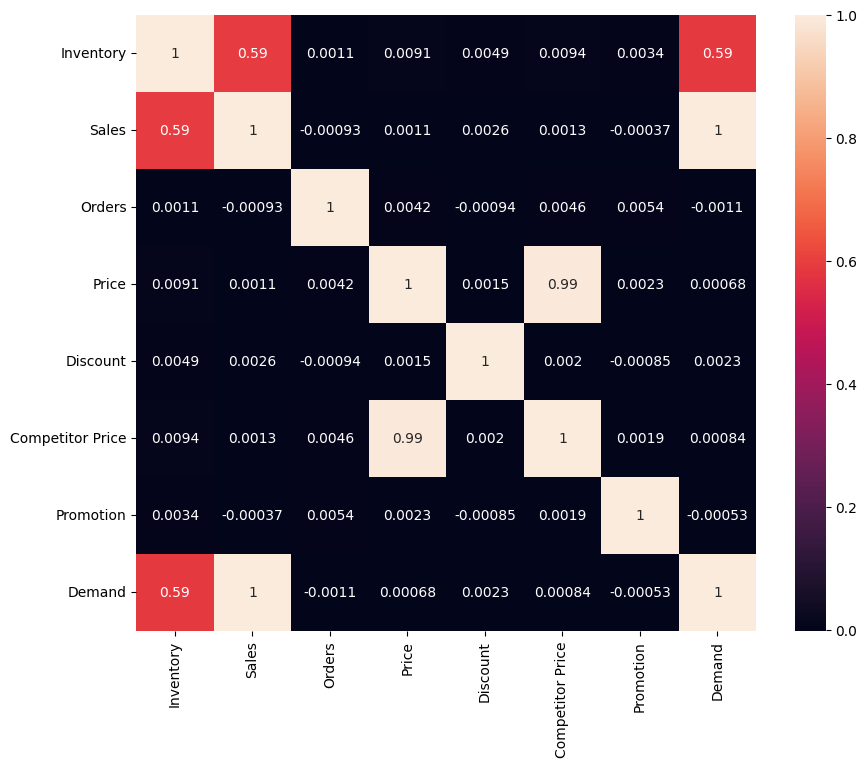

In [11]:
numarical_columns = ['Inventory','Sales','Orders','Price','Discount','Competitor Price','Promotion','Demand']

corr_matrix = df[numarical_columns].corr()

plt.figure(figsize=(10,8))

sns.heatmap(corr_matrix, annot=True)

plt.show()

# Preprocessing

**1-Detrmine X & Y**

In [12]:
x=df.drop(columns=['Demand'])
y=df['Demand']

**2-Encoding**

In [13]:

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
x['Category'] = label_encoder.fit_transform(x['Category'])
x['Region'] = label_encoder.fit_transform(x['Region'])
x['Weather'] = label_encoder.fit_transform(x['Weather'])
x['Seasonality'] = label_encoder.fit_transform(x['Seasonality'])
x['Promotion'] = label_encoder.fit_transform(x['Promotion'])


In [14]:
x.head()

,Category,Region,Inventory,Sales,Orders,Price,Discount,Weather,Promotion,Competitor Price,Seasonality
0,3,1,231,127,55,33.50,20,1,0,29.69,0
1,4,2,204,150,66,63.01,20,3,0,66.16,0
2,4,3,102,65,51,27.99,10,3,1,31.32,2
3,4,1,469,61,164,32.72,10,0,1,34.74,0
4,1,0,166,14,135,73.64,0,3,0,68.95,2


**3-Scale Data**

In [15]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
x

array([[ 0.70588851, -0.44525719, -0.33451587, ..., -0.99462457,
        -0.97193139, -1.34431734],
       [ 1.41297645,  0.44892689, -0.54229028, ..., -0.99462457,
         0.42051951, -1.34431734],
       [ 1.41297645,  1.34311098, -1.32721586, ...,  1.00540448,
        -0.90969682,  0.4459506 ],
       ...,
       [-1.41537533,  1.34311098,  0.02716553, ..., -0.99462457,
        -1.68896534,  1.34108457],
       [ 1.41297645, -1.33944127,  0.76591902, ..., -0.99462457,
         0.02496724, -0.44918337],
       [ 0.70588851, -1.33944127, -1.21178563, ...,  1.00540448,
         0.93061394, -0.44918337]])

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=1989)

In [17]:
x_train.shape

(65790, 11)

In [18]:
y_train.value_counts(normalize=True)*100

Demand
46.06     0.01672
33.84     0.01672
38.86     0.01672
27.43     0.01672
21.84     0.01672
           ...   
199.79    0.00152
12.09     0.00152
184.65    0.00152
402.26    0.00152
121.75    0.00152
Name: proportion, Length: 30266, dtype: float64

## Data Modelling

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from tabulate import tabulate

def evaluate_model(model, x_train, y_train, x_test, y_test):
    # Calculate metrics
    train_r2 = model.score(x_train, y_train)
    y_pred = model.predict(x_test)
    test_r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    
    # Prepare the table data
    metrics = [
        ["Training R² Score", f"{train_r2:.4f}"],
        ["Testing R² Score", f"{test_r2:.4f}"],
        ["Mean Squared Error (MSE)", f"{mse:.2f}"],
        ["Root Mean Squared Error (RMSE)", f"{rmse:.2f}"],
        ["Mean Absolute Error (MAE)", f"{mae:.2f}"],
    ]
    
    # Print the table
    print(tabulate(metrics, headers=["Metric", "Value"], tablefmt="grid"))

**1-LinearRegression**

In [ ]:
lr = LinearRegression()

lr.fit(x_train, y_train)

In [ ]:
# Evaluate the model
evaluate_model(lr, x_train, y_train, x_test, y_test)

**2-Support Vector Regression**

In [ ]:
svr = SVR()

svr.fit(x_train, y_train)

In [ ]:
evaluate_model(svr, x_train, y_train, x_test, y_test)

**3-DecisionTreeRegressor**

In [ ]:
DT = DecisionTreeRegressor()

DT.fit(x_train, y_train)

In [ ]:
evaluate_model(DT, x_train, y_train, x_test, y_test)

**4-KNeighborsRegressor**

In [ ]:
KNR = KNeighborsRegressor()

KNR.fit(x_train,y_train)

In [ ]:
evaluate_model(KNR, x_train, y_train, x_test, y_test)

# **Summary of Models and Best Model Selection**

After evaluating the performance of the four regression models — **LinearRegression**, **SVR (Support Vector Regression)**, **DecisionTreeRegressor**, and **KNeighborsRegressor** — on the retail store dataset, the results are summarized as follows:

| **Model**                | **Training R²**  | **Testing R²** | **MSE** | **RMSE** | **MAE** |
|---------------------------|-----------------|----------------|---------|----------|---------|
| **LinearRegression**      | 0.9937          | 0.9937         | 74.77   | 8.65     | 7.48    |
| **SVR**                   | 0.9809          | 0.981          | 225.18  | 15.01    | 10.79   |
| **DecisionTreeRegressor** | 1.0000          | 0.9871         | 152.99  | 12.37    | 10.08   |
| **KNeighborsRegressor**   | 0.9616          | 0.9445         | 658.82  | 25.67    | 20.73   |

---

## **Model Analysis**

1. **LinearRegression**  
   - **Training R² Score**: 0.9937  
   - **Testing R² Score**: 0.9937  
   - **MSE**: 74.77  
   - **RMSE**: 8.65  
   - **MAE**: 7.48  
   - This model provided **excellent performance**, with low errors and high consistency between training and testing scores, suggesting a well-fitting model.

2. **SVR (Support Vector Regression)**  
   - **Training R² Score**: 0.9809  
   - **Testing R² Score**: 0.981  
   - **MSE**: 225.18  
   - **RMSE**: 15.01  
   - **MAE**: 10.79  
   - The SVR model showed **good performance** but had higher errors compared to LinearRegression. It captures non-linear relationships but does not outperform LinearRegression.

3. **DecisionTreeRegressor**  
   - **Training R² Score**: 1.0000  
   - **Testing R² Score**: 0.9871  
   - **MSE**: 152.99  
   - **RMSE**: 12.37  
   - **MAE**: 10.08  
   - This model exhibited **overfitting** (perfect Training R² score) but performed decently on the test set. The errors are higher than LinearRegression, indicating it may not generalize as well.

4. **KNeighborsRegressor**  
   - **Training R² Score**: 0.9616
   - **Testing R² Score**: 0.9445 
   - **MSE**: 658.82
   - **RMSE**: 25.67
   - **MAE**: 20.73  
   - This model had the **worst performance**, with the highest error rates and the lowest R² scores. It does not capture the data patterns as effectively as the other models.

---

## **Best Model: LinearRegression**

Based on the evaluation metrics, **LinearRegression** is the best model for predicting demand in the retail store dataset. It provides:

- **The highest Testing R² score (0.9937)**  
- **The lowest error rates (MSE = 74.77, RMSE = 8.65, MAE = 7.48)**  
- **Consistent performance** between training and testing, indicating no overfitting or underfitting.

Therefore, **LinearRegression** is the most reliable choice for this dataset.
